In [128]:
import pandas_datareader as web
import matplotlib.pyplot as plt
import mplfinance as mpf
import seaborn as sns
import datetime as dt
import numpy as np
import scipy.stats as stats

In [105]:
#Retrieve info from yahoo finance data
currency = 'AUD'
metric = 'Close'

start = dt.datetime(2016, 1, 1)
end = dt.datetime.now()

crypto = ['BTC', 'ETH', 'ADA', 'XRP', 'BNB', 'USDT']
colnames = []

first = True

for ticker in crypto:
    data = web.DataReader(f'{ticker}-{currency}', "yahoo", start, end)
    if first:
        combined = data[[metric]].copy()
        colnames.append(ticker)
        combined.columns = colnames
        first = False
    else:
        combined = combined.join(data[metric])
        colnames.append(ticker)
        combined.columns = colnames

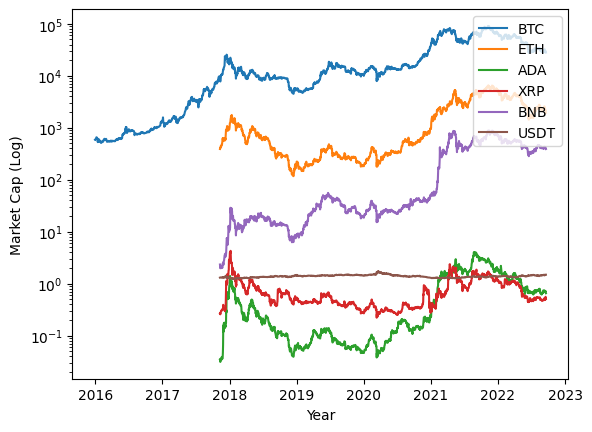

In [106]:
plt.yscale('log')

for ticker in crypto:
    plt.plot(combined[ticker], label=ticker)
    plt.xlabel('Year')
    plt.ylabel('Market Cap (Log)')
    
plt.legend(loc='upper right')
plt.show()

#### Even though there are very different prices, they have very correlated fluctuations. Except the two stable coins USDC and USDT

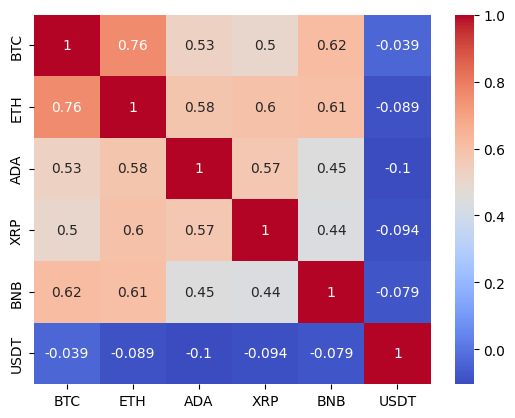

In [107]:
combined_corr = combined.pct_change().corr(method='pearson')
sns.heatmap(combined_corr, annot=True, cmap='coolwarm')
plt.show()

In [108]:
combined_corr

,BTC,ETH,ADA,XRP,BNB,USDT
BTC,1.000000,0.759181,0.528851,0.495531,0.617646,-0.038559
ETH,0.759181,1.000000,0.582550,0.595410,0.606492,-0.089291
ADA,0.528851,0.582550,1.000000,0.573230,0.450596,-0.104583
XRP,0.495531,0.595410,0.573230,1.000000,0.437101,-0.093809
BNB,0.617646,0.606492,0.450596,0.437101,1.000000,-0.079294
USDT,-0.038559,-0.089291,-0.104583,-0.093809,-0.079294,1.000000


In [109]:
combined

,BTC,ETH,ADA,XRP,BNB,USDT
Date,,,,,,
2015-12-31,590.141174,NaN,NaN,NaN,NaN,NaN
2016-01-01,595.304321,NaN,NaN,NaN,NaN,NaN
2016-01-02,594.076172,NaN,NaN,NaN,NaN,NaN
2016-01-03,590.512207,NaN,NaN,NaN,NaN,NaN
2016-01-04,603.022827,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2022-09-15,29464.164062,2200.992676,0.696394,0.488050,405.005524,1.495556
2022-09-16,29423.800781,2131.641113,0.705552,0.530791,408.716492,1.488083
2022-09-17,29951.927734,2187.128418,0.724939,0.561021,415.552063,1.488249


### Daily Returns as a measure of volatility

In [110]:
import pandas as pd

In [130]:
rtn = combined.pct_change().dropna(axis=0)*100
rtn

,BTC,ETH,ADA,XRP,BNB,USDT
Date,,,,,,
2017-11-11,-3.936764,5.155505,1.172342,1.911517,-7.032889,0.296154
2017-11-12,-6.226518,-1.960380,-12.439271,-6.037271,-8.847753,0.541817
2017-11-13,10.705561,3.292897,8.087001,3.526224,11.450920,0.110785
2017-11-14,0.963681,6.394105,1.436789,2.934569,-5.761315,-0.445813
2017-11-15,10.810837,-0.758549,1.335002,2.013550,-3.407417,0.149493
...,...,...,...,...,...,...
2022-09-15,-1.701914,-9.081818,-2.308889,-3.657292,-2.109324,0.977805
2022-09-16,-0.136991,-3.150922,1.315054,8.757498,0.916276,-0.499680
2022-09-17,1.794897,2.603032,2.747779,5.695271,1.672448,0.011151


In [141]:
rtn.describe()

,BTC,ETH,ADA,XRP,BNB,USDT
count,1774.000000,1774.000000,1774.000000,1774.000000,1774.000000,1774.000000
mean,0.146496,0.219348,0.407944,0.244107,0.465963,0.009653
std,3.987123,5.040655,7.550409,6.693775,6.105007,0.709574
min,-35.142703,-40.487408,-37.619261,-42.548624,-40.030527,-5.629865
25%,-1.698306,-2.196878,-2.919315,-2.325346,-2.252260,-0.332324
50%,0.096723,0.129450,-0.030536,-0.098684,0.129794,0.000756
75%,1.816724,2.667449,2.943248,2.127133,2.903803,0.309581
max,26.181102,26.006138,136.648367,82.632829,67.560151,8.887209


(-20.0, 20.0)

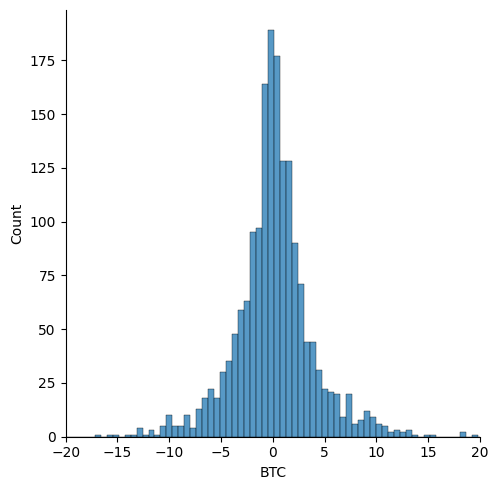

In [131]:
sns.displot(rtn.BTC)
plt.xlim(-20, 20)

(-20.0, 20.0)

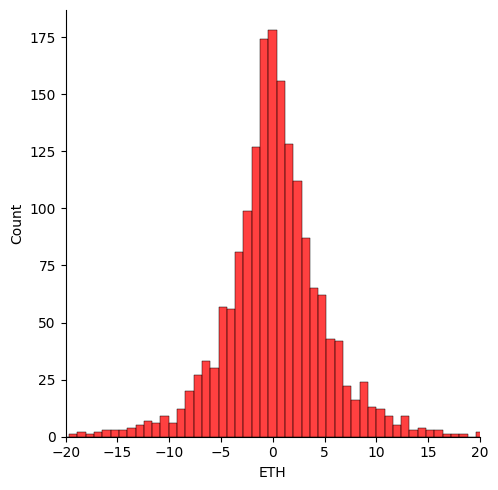

In [115]:
sns.displot(rtn.ETH, color = 'r')
plt.xlim(-20, 20)

(-20.0, 20.0)

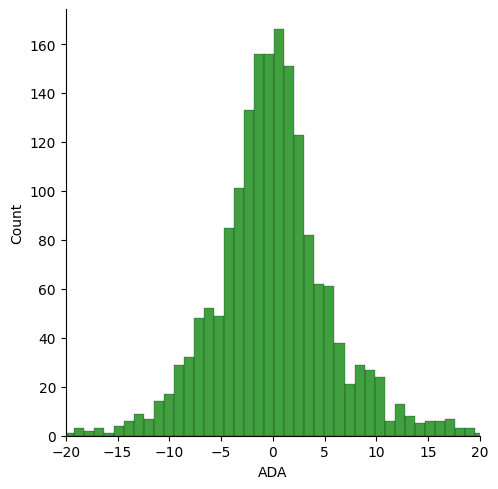

In [116]:
sns.displot(rtn.ADA, color = 'g')
plt.xlim(-20, 20)

(-20.0, 20.0)

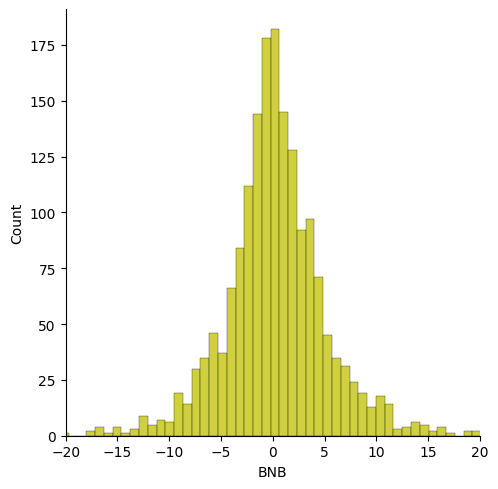

In [117]:
sns.displot(rtn.BNB, color = 'y')
plt.xlim(-20, 20)

(-4.0, 4.0)

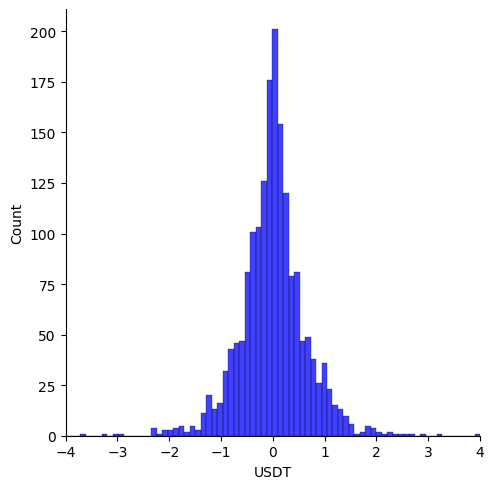

In [118]:
sns.displot(rtn.USDT, color = 'b')
plt.xlim(-4, 4)

### Daily Volatilities over Time

Text(0.5, 1.0, 'USDT')

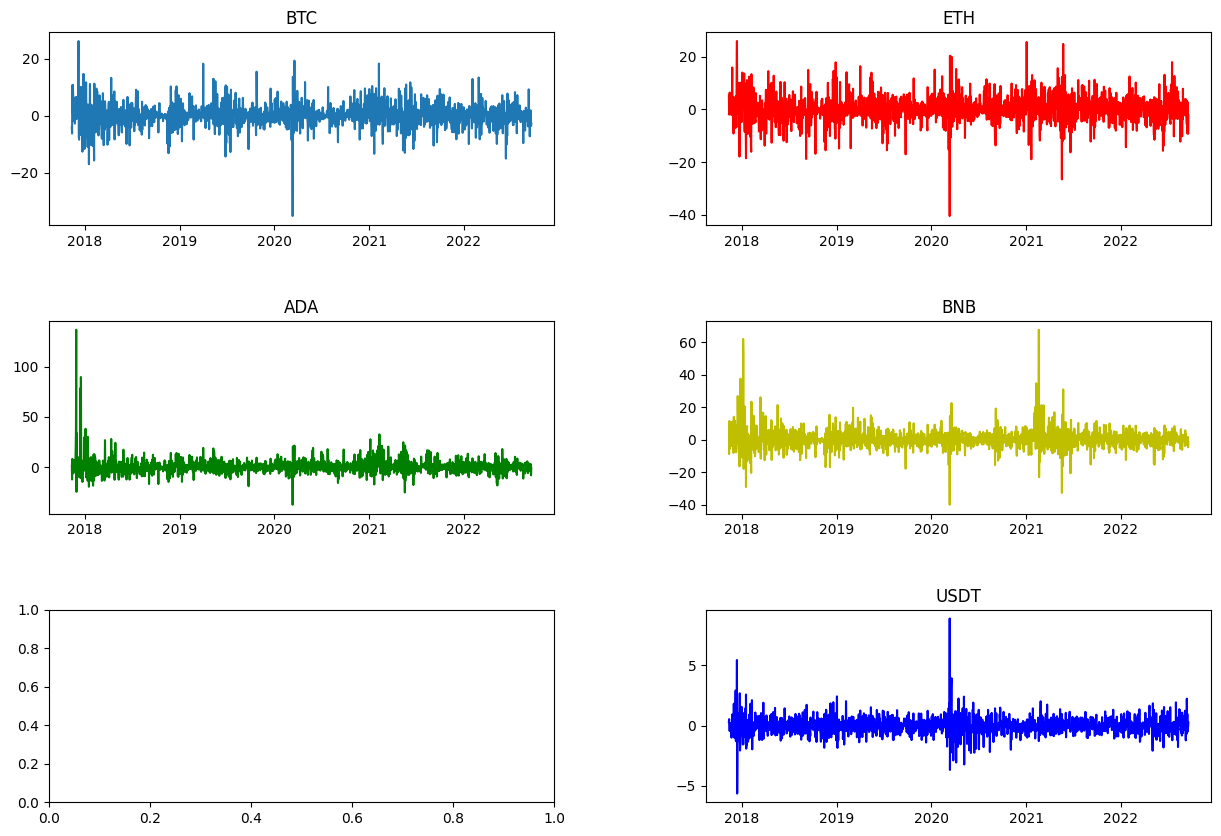

In [140]:
fig, axs = plt.subplots(3, 2, figsize=(15,10),gridspec_kw={'hspace': 0.5, 'wspace':0.3})

axs[0,0].plot(rtn['BTC'])
axs[0,0].set_title('BTC')
axs[0,1].plot(rtn['ETH'], c ='r')
axs[0,1].set_title('ETH')
axs[1,0].plot(rtn['ADA'], c ='g')
axs[1,0].set_title('ADA')
axs[1,1].plot(rtn['BNB'], c ='y')
axs[1,1].set_title('BNB')
axs[2,1].plot(rtn['USDT'], c ='b')
axs[2,1].set_title('USDT')

### Description of daily returns and extreme outliers
#### I noticed that there were some extreme outliers in a distribution graph. We will investigate this.

<AxesSubplot:>

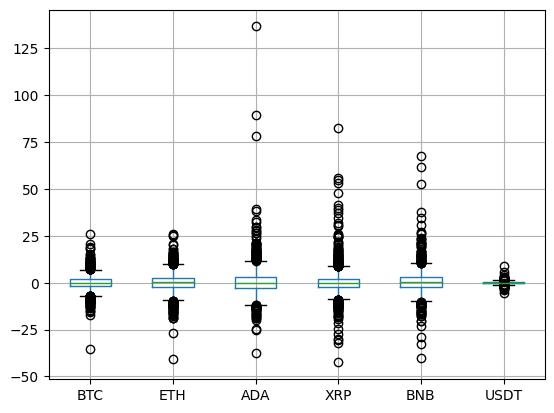

In [142]:
rtn.boxplot()
#Many cryptocurrencies have extreme outliers in the daily return

<AxesSubplot:>

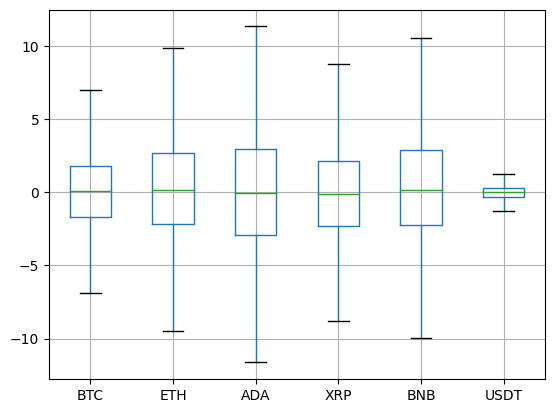

In [143]:
rtn.boxplot(showfliers=False)
#Still standard deviation is very high compared to stable coin (USDT)

### Volatility over time

In [122]:
# We want to try and plot z score which is a measure of volatility
zscore = combined.dropna(axis=0)
zscore = zscore.apply(stats.zscore)
zscore

,BTC,ETH,ADA,XRP,BNB,USDT
Date,,,,,,
2017-11-10,-0.826326,-0.684784,-0.739878,-0.946253,-0.748061,-1.057608
2017-11-11,-0.841101,-0.672653,-0.739398,-0.935481,-0.748717,-1.006698
2017-11-12,-0.863549,-0.677504,-0.744549,-0.970153,-0.749484,-0.913280
2017-11-13,-0.827355,-0.669516,-0.741617,-0.951125,-0.748579,-0.894076
2017-11-14,-0.823749,-0.653496,-0.741054,-0.934730,-0.749086,-0.971443
...,...,...,...,...,...,...
2022-09-15,0.078429,0.405681,0.024353,-0.489352,0.852749,1.330175
2022-09-16,0.076675,0.363908,0.034941,-0.399988,0.867502,1.232346
2022-09-17,0.099619,0.397330,0.057356,-0.336781,0.894677,1.234518


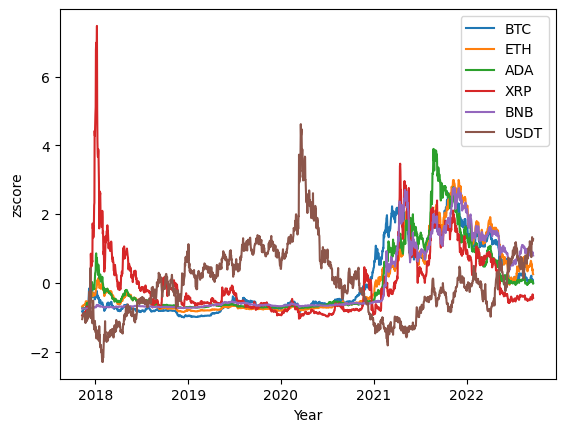

In [124]:
for ticker in crypto:
    plt.plot(zscore[ticker], label=ticker)
    plt.xlabel('Year')
    plt.ylabel('zscore')
    
plt.legend(loc='upper right')
plt.show()